In [1]:
import pandas as pd

In [24]:
diabetes = pd.read_csv('data.csv')

In [25]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()- x.min()))

In [7]:
diabetes

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,0,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,1,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,0,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,1,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,1,A


In [8]:
import tensorflow as tf

In [12]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [13]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [14]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [15]:
assigned_group

_HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

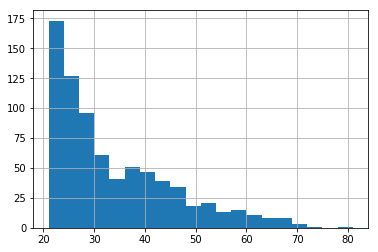

In [20]:
diabetes['Age'].hist(bins=20)

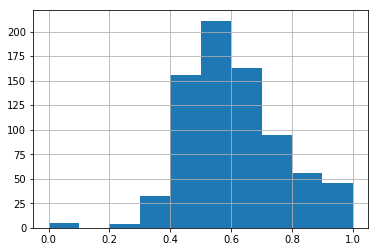

In [23]:
diabetes['Glucose_concentration'].hist()

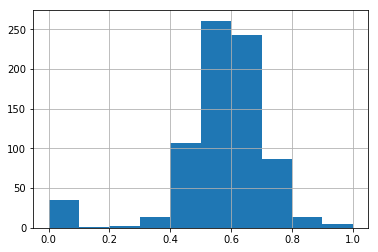

In [26]:
diabetes['Blood_pressure'].hist()

In [27]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [28]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [29]:
x_data = diabetes.drop('Class', axis=1)

In [30]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
5,5,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,A
6,3,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,C
7,10,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,A
8,2,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
9,8,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,A


In [31]:
labels = diabetes['Class']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [34]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [35]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\zinch\\AppData\\Local\\Temp\\tmpq157dvqp', '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


In [36]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\zinch\AppData\Local\Temp\tmpq157dvqp\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 472.964
INFO:tensorflow:step = 101, loss = 4.37024 (0.213 sec)
INFO:tensorflow:global_step/sec: 726.572
INFO:tensorflow:step = 201, loss = 5.73774 (0.138 sec)
INFO:tensorflow:global_step/sec: 828.665
INFO:tensorflow:step = 301, loss = 6.0647 (0.122 sec)
INFO:tensorflow:global_step/sec: 731.871
INFO:tensorflow:step = 401, loss = 6.89594 (0.136 sec)
INFO:tensorflow:global_step/sec: 759.602
INFO:tensorflow:step = 501, loss = 5.42851 (0.132 sec)
INFO:tensorflow:global_step/sec: 726.576
INFO:tensorflow:step = 601, loss = 5.31114 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.723
INFO:tensorflow:step = 701, loss = 4.77462 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.719
INFO:tensorflow:step = 801, loss = 4.04719 (0.134 sec)
INFO:tensorflow:global_step/sec: 765.398
INF

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [38]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-04-19-21:56:10
INFO:tensorflow:Restoring parameters from C:\Users\zinch\AppData\Local\Temp\tmpq157dvqp\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-04-19-21:56:11
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.716535, accuracy_baseline = 0.65748, auc = 0.775277, auc_precision_recall = 0.609439, average_loss = 0.541624, global_step = 1000, label/mean = 0.34252, loss = 5.29125, prediction/mean = 0.376705


In [39]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.77527702,
 'auc_precision_recall': 0.60943913,
 'average_loss': 0.54162437,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2912531,
 'prediction/mean': 0.37670532}

In [40]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [41]:
predictions = model.predict(pred_input_func)

In [42]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\zinch\AppData\Local\Temp\tmpq157dvqp\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54441708], dtype=float32),
  'logits': array([ 0.1781379], dtype=float32),
  'probabilities': array([ 0.45558295,  0.54441708], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.59685618], dtype=float32),
  'logits': array([ 0.39238262], dtype=float32),
  'probabilities': array([ 0.40314388,  0.59685618], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.44066405], dtype=float32),
  'logits': array([-0.23846745], dtype=float32),
  'probabilities': array([ 0.55933595,  0.44066408], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31618655], dtype=float32),
  'logits': array([-0.77135277], dtype=float32),
  'probabilities': array([ 0.68381345,  0.31618655], dtype=floa

In [54]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree,embedded_group_column, age_bucket]
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\zinch\\AppData\\Local\\Temp\\tmpykvzy0t3', '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


In [55]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\zinch\AppData\Local\Temp\tmpykvzy0t3\model.ckpt.
INFO:tensorflow:step = 1, loss = 7.27984
INFO:tensorflow:global_step/sec: 393.207
INFO:tensorflow:step = 101, loss = 6.63169 (0.257 sec)
INFO:tensorflow:global_step/sec: 550.921
INFO:tensorflow:step = 201, loss = 5.22085 (0.180 sec)
INFO:tensorflow:global_step/sec: 821.866
INFO:tensorflow:step = 301, loss = 5.66416 (0.122 sec)
INFO:tensorflow:global_step/sec: 795.77
INFO:tensorflow:step = 401, loss = 5.65514 (0.126 sec)
INFO:tensorflow:global_step/sec: 777.274
INFO:tensorflow:step = 501, loss = 5.6172 (0.129 sec)
INFO:tensorflow:global_step/sec: 455.756
INFO:tensorflow:step = 601, loss = 3.99176 (0.220 sec)
INFO:tensorflow:global_step/sec: 679.853
INFO:tensorflow:step = 701, loss = 2.56448 (0.145 sec)
INFO:tensorflow:global_step/sec: 828.667
INFO:tensorflow:step = 801, loss = 5.29101 (0.122 sec)
INFO:tensorflow:global_step/sec: 586.354
INFO

In [56]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [57]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-04-19-22:11:02
INFO:tensorflow:Restoring parameters from C:\Users\zinch\AppData\Local\Temp\tmpykvzy0t3\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-04-19-22:11:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.724409, accuracy_baseline = 0.65748, auc = 0.783777, auc_precision_recall = 0.625326, average_loss = 0.534765, global_step = 1000, label/mean = 0.34252, loss = 5.22424, prediction/mean = 0.343985


{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78377724,
 'auc_precision_recall': 0.6253255,
 'average_loss': 0.53476512,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2242436,
 'prediction/mean': 0.34398514}